In [2]:
pip install wordcloud

     |████████████████████████████████| 157 kB 1.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

In [6]:
data1 = pd.read_csv("combined-csv-files.csv")

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data1.shape

(305590, 108)

In [8]:
data1.dtypes

id                                              object
listing_url                                     object
scrape_id                                       object
last_scraped                                    object
name                                            object
                                                 ...  
calculated_host_listings_count_private_rooms    object
calculated_host_listings_count_shared_rooms     object
reviews_per_month                               object
Unnamed: 106                                    object
city.1                                          object
Length: 108, dtype: object

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305590 entries, 0 to 305589
Columns: 108 entries, id to city.1
dtypes: object(108)
memory usage: 251.8+ MB


In [10]:
data1.head()

id                          listing_url    scrape_id last_scraped  \
0   38585   https://www.airbnb.com/rooms/38585  2.02003E+13    3/21/2020   
1   80905   https://www.airbnb.com/rooms/80905  2.02003E+13    3/21/2020   
2  108061  https://www.airbnb.com/rooms/108061  2.02003E+13    3/21/2020   
3  155305  https://www.airbnb.com/rooms/155305  2.02003E+13    3/21/2020   
4  156805  https://www.airbnb.com/rooms/156805  2.02003E+13    3/21/2020   

                                              name  \
0  Charming Victorian home - twin beds + breakfast   
1                                 French Chic Loft   
2                  Walk downtown or UNCA, Pets OK!   
3               Cottage! BonPaul + Sharky's Hostel   
4                Private Room "Ader" at BPS Hostel   

                                             summary  \
0  Per the City Council of Asheville. Due to the ...   
1  Let yourself melt into the delectable décor of...   
2  Walk to town in ten minutes! Monthly rental in...   
3                                                NaN   
4                                                NaN   

                                               space  \
0  Charming room with 2 twin size beds, furnished...   
1  Have you ever gazed at dreamy photos in a maga...   
2  True Asheville...artist styled apartment with ...   
3  Private cottage located behind the main house ...   
4  Private Rooms at Bon Paul and Sharky's Hostel....   

                                         description experiences_offered  \
0  Per the City Council of Asheville. Due to the ...                none   
1  Let yourself melt into the delectable décor of...                none   
2  Walk to town in ten minutes! Monthly rental in...                none   
3  Private cottage located behind the main house ...                none   
4  Private Rooms at Bon Paul and Sharky's Hostel....                none   

                               neighborhood_overview  ...  \
0  Our North Asheville neighborhood stretches alo...  ...   
1  Quiet, tucked away from the hustle and bustle ...  ...   
2  I love my neighborhood! Its friendly, easy-goi...  ...   
3  We are within easy walk of pubs, breweries, mu...  ...   
4  Easy walk to pubs, cafes, bakery, breweries, l...  ...   

           cancellation_policy require_guest_profile_picture  \
0                     moderate                             t   
1              super_strict_60                             f   
2  strict_14_with_grace_period                             f   
3                     moderate                             f   
4                     moderate                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                t                              1   
1                                f                             11   
2                                f                              2   
3                                f                              7   
4                                f                              7   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                          11   
2                                           2   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            2   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month Unnamed: 106  \
0                                           0              1.21          NaN   
1                                           0              1.03          NaN   
2                                           0              0.86          NaN   
3          

In [11]:
data1.duplicated().sum()

48863

In [12]:
data1.drop_duplicates(inplace=True)

In [13]:
data1.head()

id                          listing_url    scrape_id last_scraped  \
0   38585   https://www.airbnb.com/rooms/38585  2.02003E+13    3/21/2020   
1   80905   https://www.airbnb.com/rooms/80905  2.02003E+13    3/21/2020   
2  108061  https://www.airbnb.com/rooms/108061  2.02003E+13    3/21/2020   
3  155305  https://www.airbnb.com/rooms/155305  2.02003E+13    3/21/2020   
4  156805  https://www.airbnb.com/rooms/156805  2.02003E+13    3/21/2020   

                                              name  \
0  Charming Victorian home - twin beds + breakfast   
1                                 French Chic Loft   
2                  Walk downtown or UNCA, Pets OK!   
3               Cottage! BonPaul + Sharky's Hostel   
4                Private Room "Ader" at BPS Hostel   

                                             summary  \
0  Per the City Council of Asheville. Due to the ...   
1  Let yourself melt into the delectable décor of...   
2  Walk to town in ten minutes! Monthly rental in...   
3                                                NaN   
4                                                NaN   

                                               space  \
0  Charming room with 2 twin size beds, furnished...   
1  Have you ever gazed at dreamy photos in a maga...   
2  True Asheville...artist styled apartment with ...   
3  Private cottage located behind the main house ...   
4  Private Rooms at Bon Paul and Sharky's Hostel....   

                                         description experiences_offered  \
0  Per the City Council of Asheville. Due to the ...                none   
1  Let yourself melt into the delectable décor of...                none   
2  Walk to town in ten minutes! Monthly rental in...                none   
3  Private cottage located behind the main house ...                none   
4  Private Rooms at Bon Paul and Sharky's Hostel....                none   

                               neighborhood_overview  ...  \
0  Our North Asheville neighborhood stretches alo...  ...   
1  Quiet, tucked away from the hustle and bustle ...  ...   
2  I love my neighborhood! Its friendly, easy-goi...  ...   
3  We are within easy walk of pubs, breweries, mu...  ...   
4  Easy walk to pubs, cafes, bakery, breweries, l...  ...   

           cancellation_policy require_guest_profile_picture  \
0                     moderate                             t   
1              super_strict_60                             f   
2  strict_14_with_grace_period                             f   
3                     moderate                             f   
4                     moderate                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                t                              1   
1                                f                             11   
2                                f                              2   
3                                f                              7   
4                                f                              7   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                          11   
2                                           2   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            2   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month Unnamed: 106  \
0                                           0              1.21          NaN   
1                                           0              1.03          NaN   
2                                           0              0.86          NaN   
3          

In [14]:
data1.isnull().sum()

id                                                   2
listing_url                                          3
scrape_id                                            3
last_scraped                                         3
name                                                30
                                                 ...  
calculated_host_listings_count_private_rooms         3
calculated_host_listings_count_shared_rooms          3
reviews_per_month                                49233
Unnamed: 106                                    199883
city.1                                           62200
Length: 108, dtype: int64

In [15]:
data = data1.drop(['review_scores_value', 'requires_license', 'require_guest_phone_verification','require_guest_profile_picture'], axis=1)

In [16]:
data.head()

id                          listing_url    scrape_id last_scraped  \
0   38585   https://www.airbnb.com/rooms/38585  2.02003E+13    3/21/2020   
1   80905   https://www.airbnb.com/rooms/80905  2.02003E+13    3/21/2020   
2  108061  https://www.airbnb.com/rooms/108061  2.02003E+13    3/21/2020   
3  155305  https://www.airbnb.com/rooms/155305  2.02003E+13    3/21/2020   
4  156805  https://www.airbnb.com/rooms/156805  2.02003E+13    3/21/2020   

                                              name  \
0  Charming Victorian home - twin beds + breakfast   
1                                 French Chic Loft   
2                  Walk downtown or UNCA, Pets OK!   
3               Cottage! BonPaul + Sharky's Hostel   
4                Private Room "Ader" at BPS Hostel   

                                             summary  \
0  Per the City Council of Asheville. Due to the ...   
1  Let yourself melt into the delectable décor of...   
2  Walk to town in ten minutes! Monthly rental in...   
3                                                NaN   
4                                                NaN   

                                               space  \
0  Charming room with 2 twin size beds, furnished...   
1  Have you ever gazed at dreamy photos in a maga...   
2  True Asheville...artist styled apartment with ...   
3  Private cottage located behind the main house ...   
4  Private Rooms at Bon Paul and Sharky's Hostel....   

                                         description experiences_offered  \
0  Per the City Council of Asheville. Due to the ...                none   
1  Let yourself melt into the delectable décor of...                none   
2  Walk to town in ten minutes! Monthly rental in...                none   
3  Private cottage located behind the main house ...                none   
4  Private Rooms at Bon Paul and Sharky's Hostel....                none   

                               neighborhood_overview  ... instant_bookable  \
0  Our North Asheville neighborhood stretches alo...  ...                f   
1  Quiet, tucked away from the hustle and bustle ...  ...                t   
2  I love my neighborhood! Its friendly, easy-goi...  ...                f   
3  We are within easy walk of pubs, breweries, mu...  ...                t   
4  Easy walk to pubs, cafes, bakery, breweries, l...  ...                t   

  is_business_travel_ready          cancellation_policy  \
0                        f                     moderate   
1                        f              super_strict_60   
2                        f  strict_14_with_grace_period   
3                        f                     moderate   
4                        f                     moderate   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           0   
1                             11                                          11   
2                              2                                           2   
3                              7                                           1   
4                              7                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            2   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month Unnamed: 106  \
0                                           0              1.21          NaN   
1                                           0              1.03          NaN   
2                                           0              0.86          NaN   
3                                           4              2.28          NaN   
4                                           4              0.65          NaN   

      c

In [17]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'Unnamed: 106', 'city.1'],
      dtype='object', length=104)

In [18]:
#pd.options.display.max_columns = None

In [19]:
#pd.options.display.max_rows = None

In [20]:
data.head()

id                          listing_url    scrape_id last_scraped  \
0   38585   https://www.airbnb.com/rooms/38585  2.02003E+13    3/21/2020   
1   80905   https://www.airbnb.com/rooms/80905  2.02003E+13    3/21/2020   
2  108061  https://www.airbnb.com/rooms/108061  2.02003E+13    3/21/2020   
3  155305  https://www.airbnb.com/rooms/155305  2.02003E+13    3/21/2020   
4  156805  https://www.airbnb.com/rooms/156805  2.02003E+13    3/21/2020   

                                              name  \
0  Charming Victorian home - twin beds + breakfast   
1                                 French Chic Loft   
2                  Walk downtown or UNCA, Pets OK!   
3               Cottage! BonPaul + Sharky's Hostel   
4                Private Room "Ader" at BPS Hostel   

                                             summary  \
0  Per the City Council of Asheville. Due to the ...   
1  Let yourself melt into the delectable décor of...   
2  Walk to town in ten minutes! Monthly rental in...   
3                                                NaN   
4                                                NaN   

                                               space  \
0  Charming room with 2 twin size beds, furnished...   
1  Have you ever gazed at dreamy photos in a maga...   
2  True Asheville...artist styled apartment with ...   
3  Private cottage located behind the main house ...   
4  Private Rooms at Bon Paul and Sharky's Hostel....   

                                         description experiences_offered  \
0  Per the City Council of Asheville. Due to the ...                none   
1  Let yourself melt into the delectable décor of...                none   
2  Walk to town in ten minutes! Monthly rental in...                none   
3  Private cottage located behind the main house ...                none   
4  Private Rooms at Bon Paul and Sharky's Hostel....                none   

                               neighborhood_overview  ... instant_bookable  \
0  Our North Asheville neighborhood stretches alo...  ...                f   
1  Quiet, tucked away from the hustle and bustle ...  ...                t   
2  I love my neighborhood! Its friendly, easy-goi...  ...                f   
3  We are within easy walk of pubs, breweries, mu...  ...                t   
4  Easy walk to pubs, cafes, bakery, breweries, l...  ...                t   

  is_business_travel_ready          cancellation_policy  \
0                        f                     moderate   
1                        f              super_strict_60   
2                        f  strict_14_with_grace_period   
3                        f                     moderate   
4                        f                     moderate   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           0   
1                             11                                          11   
2                              2                                           2   
3                              7                                           1   
4                              7                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            2   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month Unnamed: 106  \
0                                           0              1.21          NaN   
1                                           0              1.03          NaN   
2                                           0              0.86          NaN   
3                                           4              2.28          NaN   
4                                           4              0.65          NaN   

      c

In [21]:
#'id','last_scraped','name','host_id','access','host_since','host_location','host_response_time','host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count','city','state','latitude','longitude','room_type','accomodates','bathrooms','bedrooms','beds','square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','minimum_nights','maximum_nights','has_availability','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','instant_bookable','is_business_travel_ready''calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms', 'reviews_per_month','Unnamed: 106', 'city.1'

In [22]:
host = data[['id','last_scraped','name','host_id','access','host_since','host_location','host_response_time','host_response_rate','host_acceptance_rate','host_listings_count',
             'host_total_listings_count','city','state','latitude','longitude',
             'room_type','accommodates','bathrooms','bedrooms','beds','square_feet',
             'price','weekly_price','monthly_price','security_deposit',
             'cleaning_fee','guests_included','minimum_nights','maximum_nights',
             'has_availability','availability_30','availability_60','availability_90',
             'availability_365','number_of_reviews','review_scores_rating',
             'review_scores_accuracy','review_scores_cleanliness',
             'review_scores_checkin','review_scores_communication','instant_bookable',
             'is_business_travel_ready','calculated_host_listings_count',
             'calculated_host_listings_count_entire_homes',
             'calculated_host_listings_count_private_rooms',
             'calculated_host_listings_count_shared_rooms',
             'reviews_per_month','Unnamed: 106', 'city.1']]

In [23]:
host.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256727 entries, 0 to 305589
Data columns (total 50 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   id                                            256725 non-null  object
 1   last_scraped                                  256724 non-null  object
 2   name                                          256697 non-null  object
 3   host_id                                       256724 non-null  object
 4   access                                        150532 non-null  object
 5   host_since                                    256695 non-null  object
 6   host_location                                 256126 non-null  object
 7   host_response_time                            204618 non-null  object
 8   host_response_rate                            204618 non-null  object
 9   host_acceptance_rate                          220301 non-nu

In [24]:
host.head()

id last_scraped                                             name  \
0   38585    3/21/2020  Charming Victorian home - twin beds + breakfast   
1   80905    3/21/2020                                 French Chic Loft   
2  108061    3/21/2020                  Walk downtown or UNCA, Pets OK!   
3  155305    3/21/2020               Cottage! BonPaul + Sharky's Hostel   
4  156805    3/21/2020                Private Room "Ader" at BPS Hostel   

  host_id                                             access  host_since  \
0  165529  Safe parking in our driveway. You also have fu...   7/13/2010   
1  427027                                                NaN    3/7/2011   
2  320564  Off street parking, laundry room, fenced yard,...  12/16/2010   
3  746673  Guests have solo access to the cottage, and ac...   6/26/2011   
4  746673                                                NaN   6/26/2011   

                              host_location host_response_time  \
0  Asheville, North Carolina, United States     within an hour   
1  Asheville, North Carolina, United States     within an hour   
2  Asheville, North Carolina, United States       within a day   
3  Asheville, North Carolina, United States     within an hour   
4  Asheville, North Carolina, United States     within an hour   

  host_response_rate host_acceptance_rate  ... review_scores_communication  \
0               100%                  96%  ...                          10   
1               100%                  97%  ...                          10   
2                90%                  75%  ...                          10   
3               100%                  98%  ...                          10   
4               100%                  98%  ...                           9   

  instant_bookable is_business_travel_ready calculated_host_listings_count  \
0                f                        f                              1   
1                t                        f                             11   
2                f                        f                              2   
3                t                        f                              7   
4                t                        f                              7   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                          11   
2                                           2   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            2   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month Unnamed: 106  \
0                                           0              1.21          NaN   
1                                           0              1.03          NaN   
2                                           0              0.86          NaN   
3                                           4              2.28          NaN   
4                                           4              0.65          NaN   

      city.1  
0  Asheville  
1  Asheville  
2  Asheville  
3  Asheville  
4  Asheville  

[5 rows x 50 columns]

In [25]:
host = host.fillna(0)

In [26]:
host.head()

id last_scraped                                             name  \
0   38585    3/21/2020  Charming Victorian home - twin beds + breakfast   
1   80905    3/21/2020                                 French Chic Loft   
2  108061    3/21/2020                  Walk downtown or UNCA, Pets OK!   
3  155305    3/21/2020               Cottage! BonPaul + Sharky's Hostel   
4  156805    3/21/2020                Private Room "Ader" at BPS Hostel   

  host_id                                             access  host_since  \
0  165529  Safe parking in our driveway. You also have fu...   7/13/2010   
1  427027                                                  0    3/7/2011   
2  320564  Off street parking, laundry room, fenced yard,...  12/16/2010   
3  746673  Guests have solo access to the cottage, and ac...   6/26/2011   
4  746673                                                  0   6/26/2011   

                              host_location host_response_time  \
0  Asheville, North Carolina, United States     within an hour   
1  Asheville, North Carolina, United States     within an hour   
2  Asheville, North Carolina, United States       within a day   
3  Asheville, North Carolina, United States     within an hour   
4  Asheville, North Carolina, United States     within an hour   

  host_response_rate host_acceptance_rate  ... review_scores_communication  \
0               100%                  96%  ...                          10   
1               100%                  97%  ...                          10   
2                90%                  75%  ...                          10   
3               100%                  98%  ...                          10   
4               100%                  98%  ...                           9   

  instant_bookable is_business_travel_ready calculated_host_listings_count  \
0                f                        f                              1   
1                t                        f                             11   
2                f                        f                              2   
3                t                        f                              7   
4                t                        f                              7   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                          11   
2                                           2   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            2   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month Unnamed: 106  \
0                                           0              1.21            0   
1                                           0              1.03            0   
2                                           0              0.86            0   
3                                           4              2.28            0   
4                                           4              0.65            0   

      city.1  
0  Asheville  
1  Asheville  
2  Asheville  
3  Asheville  
4  Asheville  

[5 rows x 50 columns]

In [27]:
host['id']=pd.to_numeric(host['id'], errors= 'coerce')

In [28]:
host.sort_values(by=host.columns[0])
hosttable = sorted(set(host.iloc[:,0].values))
host.head()

id last_scraped                                             name  \
0   38585.0    3/21/2020  Charming Victorian home - twin beds + breakfast   
1   80905.0    3/21/2020                                 French Chic Loft   
2  108061.0    3/21/2020                  Walk downtown or UNCA, Pets OK!   
3  155305.0    3/21/2020               Cottage! BonPaul + Sharky's Hostel   
4  156805.0    3/21/2020                Private Room "Ader" at BPS Hostel   

  host_id                                             access  host_since  \
0  165529  Safe parking in our driveway. You also have fu...   7/13/2010   
1  427027                                                  0    3/7/2011   
2  320564  Off street parking, laundry room, fenced yard,...  12/16/2010   
3  746673  Guests have solo access to the cottage, and ac...   6/26/2011   
4  746673                                                  0   6/26/2011   

                              host_location host_response_time  \
0  Asheville, North Carolina, United States     within an hour   
1  Asheville, North Carolina, United States     within an hour   
2  Asheville, North Carolina, United States       within a day   
3  Asheville, North Carolina, United States     within an hour   
4  Asheville, North Carolina, United States     within an hour   

  host_response_rate host_acceptance_rate  ... review_scores_communication  \
0               100%                  96%  ...                          10   
1               100%                  97%  ...                          10   
2                90%                  75%  ...                          10   
3               100%                  98%  ...                          10   
4               100%                  98%  ...                           9   

  instant_bookable is_business_travel_ready calculated_host_listings_count  \
0                f                        f                              1   
1                t                        f                             11   
2                f                        f                              2   
3                t                        f                              7   
4                t                        f                              7   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                          11   
2                                           2   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            2   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month Unnamed: 106  \
0                                           0              1.21            0   
1                                           0              1.03            0   
2                                           0              0.86            0   
3                                           4              2.28            0   
4                                           4              0.65            0   

      city.1  
0  Asheville  
1  Asheville  
2  Asheville  
3  Asheville  
4  Asheville  

[5 rows x 50 columns]

In [29]:
host['last_scraped'] = pd.to_datetime(host['last_scraped'], errors= 'coerce')

In [30]:
host['host_id']=pd.to_numeric(host['host_id'], errors= 'coerce')

In [31]:
host['host_since'] = pd.to_datetime(host['host_since'], errors= 'coerce')

In [32]:
host['host_response_rate']= host['host_response_rate'].apply(str).str.replace('%','')

In [33]:
host['host_response_rate']=pd.to_numeric(host['host_response_rate'], errors= 'coerce')

In [34]:
host['host_acceptance_rate']= host['host_acceptance_rate'].apply(str).str.replace('%','')

In [35]:
host['host_acceptance_rate']=pd.to_numeric(host['host_acceptance_rate'], errors= 'coerce')

In [36]:
host['host_listings_count']= pd.to_numeric(host['host_listings_count'], errors='coerce')

In [37]:
host['host_total_listings_count']=pd.to_numeric(host['host_total_listings_count'], errors = 'coerce')

In [38]:
host.head()

id last_scraped                                             name  \
0   38585.0   2020-03-21  Charming Victorian home - twin beds + breakfast   
1   80905.0   2020-03-21                                 French Chic Loft   
2  108061.0   2020-03-21                  Walk downtown or UNCA, Pets OK!   
3  155305.0   2020-03-21               Cottage! BonPaul + Sharky's Hostel   
4  156805.0   2020-03-21                Private Room "Ader" at BPS Hostel   

    host_id                                             access host_since  \
0  165529.0  Safe parking in our driveway. You also have fu... 2010-07-13   
1  427027.0                                                  0 2011-03-07   
2  320564.0  Off street parking, laundry room, fenced yard,... 2010-12-16   
3  746673.0  Guests have solo access to the cottage, and ac... 2011-06-26   
4  746673.0                                                  0 2011-06-26   

                              host_location host_response_time  \
0  Asheville, North Carolina, United States     within an hour   
1  Asheville, North Carolina, United States     within an hour   
2  Asheville, North Carolina, United States       within a day   
3  Asheville, North Carolina, United States     within an hour   
4  Asheville, North Carolina, United States     within an hour   

   host_response_rate  host_acceptance_rate  ...  review_scores_communication  \
0               100.0                  96.0  ...                           10   
1               100.0                  97.0  ...                           10   
2                90.0                  75.0  ...                           10   
3               100.0                  98.0  ...                           10   
4               100.0                  98.0  ...                            9   

   instant_bookable is_business_travel_ready calculated_host_listings_count  \
0                 f                        f                              1   
1                 t                        f                             11   
2                 f                        f                              2   
3                 t                        f                              7   
4                 t                        f                              7   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                          11   
2                                           2   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            2   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month Unnamed: 106  \
0                                           0              1.21            0   
1                                           0              1.03            0   
2                                           0              0.86            0   
3                                           4              2.28            0   
4                                           4              0.65            0   

      city.1  
0  Asheville  
1  Asheville  
2  Asheville  
3  Asheville  
4  Asheville  

[5 rows x 50 columns]

In [39]:
host['accommodates']=pd.to_numeric(host['accommodates'], errors = 'coerce')

In [40]:
host['bathrooms']=pd.to_numeric(host['bathrooms'], errors = 'coerce')

In [41]:
host['beds']=pd.to_numeric(host['beds'], errors = 'coerce')

In [42]:
host['bedrooms']=pd.to_numeric(host['bedrooms'], errors = 'coerce')

In [43]:
host['square_feet']=pd.to_numeric(host['square_feet'], errors = 'coerce')

In [44]:
host['guests_included']=pd.to_numeric(host['guests_included'], errors = 'coerce')

In [45]:
host['minimum_nights']=pd.to_numeric(host['minimum_nights'], errors = 'coerce')

In [46]:
host['maximum_nights']=pd.to_numeric(host['maximum_nights'], errors = 'coerce')

In [47]:
host['availability_30']=pd.to_numeric(host['availability_30'], errors = 'coerce')

In [48]:
host['availability_60']=pd.to_numeric(host['availability_60'], errors = 'coerce')

In [49]:
host['availability_90']=pd.to_numeric(host['availability_90'], errors = 'coerce')

In [50]:
host['availability_365']=pd.to_numeric(host['availability_365'], errors = 'coerce')

In [51]:
host['number_of_reviews']=pd.to_numeric(host['number_of_reviews'], errors = 'coerce')

In [52]:
host['review_scores_rating']=pd.to_numeric(host['review_scores_rating'], errors = 'coerce')

In [53]:
host['review_scores_accuracy']=pd.to_numeric(host['review_scores_accuracy'], errors = 'coerce')

In [54]:
host['review_scores_cleanliness']=pd.to_numeric(host['review_scores_cleanliness'], errors = 'coerce')

In [55]:
host['review_scores_checkin']=pd.to_numeric(host['review_scores_checkin'], errors = 'coerce')

In [56]:
host['review_scores_communication']=pd.to_numeric(host['review_scores_communication'], errors = 'coerce')

In [57]:
host['calculated_host_listings_count']=pd.to_numeric(host['calculated_host_listings_count'], errors = 'coerce')

In [58]:
host['calculated_host_listings_count_entire_homes']=pd.to_numeric(host['calculated_host_listings_count_entire_homes'], errors = 'coerce')

In [59]:
host['calculated_host_listings_count_private_rooms']=pd.to_numeric(host['calculated_host_listings_count_private_rooms'], errors = 'coerce')

In [60]:
host['calculated_host_listings_count_shared_rooms']=pd.to_numeric(host['calculated_host_listings_count_shared_rooms'], errors = 'coerce')

In [61]:
host['reviews_per_month']=pd.to_numeric(host['reviews_per_month'], errors = 'coerce')

In [62]:
host['price'] = host['price'].apply(str).str.replace('$','')
host['price'] = host['price'].apply(str).str.replace(',','')
host['price']=pd.to_numeric(host['price'], errors= 'coerce')

In [63]:
host['weekly_price'] = host['weekly_price'].apply(str).str.replace('$','')
host['weekly_price'] = host['weekly_price'].apply(str).str.replace(',','')
host['weekly_price']=pd.to_numeric(host['weekly_price'], errors= 'coerce')

In [64]:
host['monthly_price'] = host['monthly_price'].apply(str).str.replace('$','')
host['monthly_price'] = host['monthly_price'].apply(str).str.replace(',','')
host['monthly_price']=pd.to_numeric(host['monthly_price'], errors= 'coerce')

In [65]:
host['security_deposit'] = host['security_deposit'].apply(str).str.replace('$','')
host['security_deposit'] = host['security_deposit'].apply(str).str.replace(',','')
host['security_deposit']=pd.to_numeric(host['security_deposit'], errors= 'coerce')

In [66]:
host['cleaning_fee'] = host['cleaning_fee'].apply(str).str.replace('$','')
host['cleaning_fee'] = host['cleaning_fee'].apply(str).str.replace(',','')
host['cleaning_fee']=pd.to_numeric(host['cleaning_fee'], errors= 'coerce')

In [67]:
host.head()

id last_scraped                                             name  \
0   38585.0   2020-03-21  Charming Victorian home - twin beds + breakfast   
1   80905.0   2020-03-21                                 French Chic Loft   
2  108061.0   2020-03-21                  Walk downtown or UNCA, Pets OK!   
3  155305.0   2020-03-21               Cottage! BonPaul + Sharky's Hostel   
4  156805.0   2020-03-21                Private Room "Ader" at BPS Hostel   

    host_id                                             access host_since  \
0  165529.0  Safe parking in our driveway. You also have fu... 2010-07-13   
1  427027.0                                                  0 2011-03-07   
2  320564.0  Off street parking, laundry room, fenced yard,... 2010-12-16   
3  746673.0  Guests have solo access to the cottage, and ac... 2011-06-26   
4  746673.0                                                  0 2011-06-26   

                              host_location host_response_time  \
0  Asheville, North Carolina, United States     within an hour   
1  Asheville, North Carolina, United States     within an hour   
2  Asheville, North Carolina, United States       within a day   
3  Asheville, North Carolina, United States     within an hour   
4  Asheville, North Carolina, United States     within an hour   

   host_response_rate  host_acceptance_rate  ...  review_scores_communication  \
0               100.0                  96.0  ...                         10.0   
1               100.0                  97.0  ...                         10.0   
2                90.0                  75.0  ...                         10.0   
3               100.0                  98.0  ...                         10.0   
4               100.0                  98.0  ...                          9.0   

   instant_bookable is_business_travel_ready calculated_host_listings_count  \
0                 f                        f                            1.0   
1                 t                        f                           11.0   
2                 f                        f                            2.0   
3                 t                        f                            7.0   
4                 t                        f                            7.0   

  calculated_host_listings_count_entire_homes  \
0                                         0.0   
1                                        11.0   
2                                         2.0   
3                                         1.0   
4                                         1.0   

  calculated_host_listings_count_private_rooms  \
0                                          1.0   
1                                          0.0   
2                                          0.0   
3                                          2.0   
4                                          2.0   

  calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                         0.0               1.21   
1                                         0.0               1.03   
2                                         0.0               0.86   
3                                         4.0               2.28   
4                                         4.0               0.65   

   Unnamed: 106     city.1  
0             0  Asheville  
1             0  Asheville  
2             0  Asheville  
3             0  Asheville  
4             0  Asheville  

[5 rows x 50 columns]

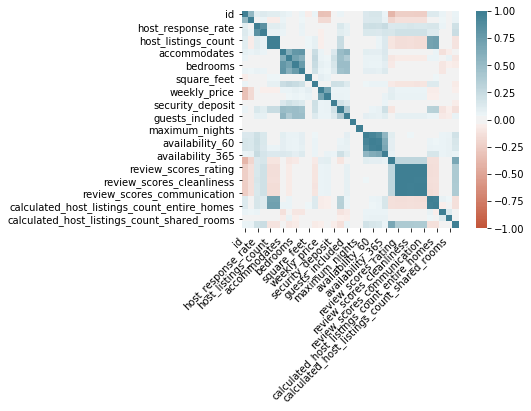

In [68]:
corr1 = host.corr()
ax = sns.heatmap(corr1, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,
    horizontalalignment='right');

In [69]:
corr = host.corr()

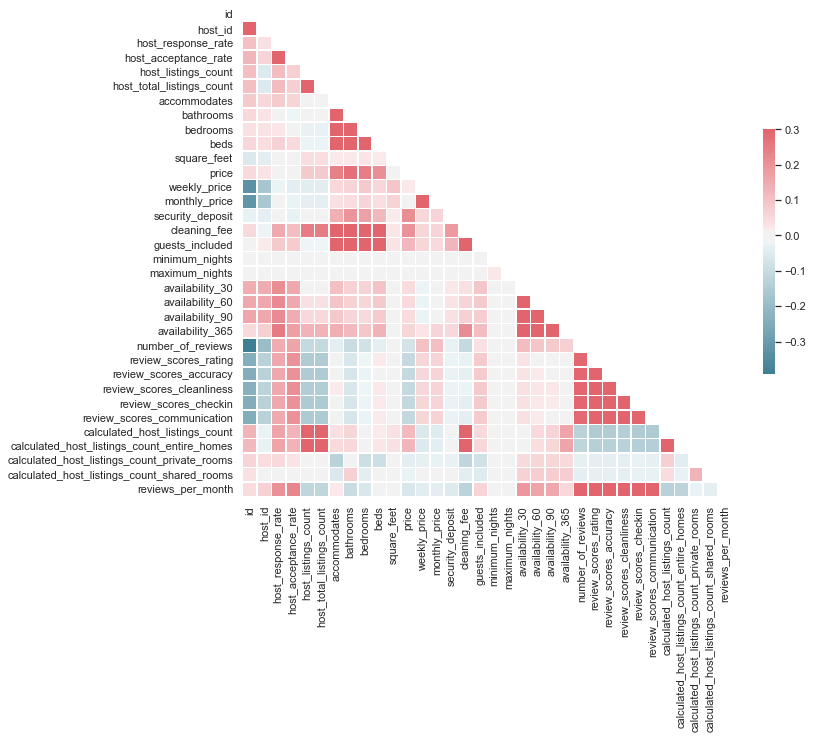

In [70]:
from string import ascii_letters
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
host.isnull()

id  last_scraped   name  host_id  access  host_since  \
0       False         False  False    False   False       False   
1       False         False  False    False   False       False   
2       False         False  False    False   False       False   
3       False         False  False    False   False       False   
4       False         False  False    False   False       False   
...       ...           ...    ...      ...     ...         ...   
305585  False         False  False    False   False       False   
305586  False         False  False    False   False       False   
305587  False         False  False    False   False       False   
305588  False         False  False    False   False       False   
305589   True         False  False    False   False       False   

        host_location  host_response_time  host_response_rate  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   
...               ...                 ...                 ...   
305585          False               False               False   
305586          False               False               False   
305587          False               False               False   
305588          False               False               False   
305589          False               False               False   

        host_acceptance_rate  ...  review_scores_communication  \
0                      False  ...                        False   
1                      False  ...                        False   
2                      False  ...                        False   
3                      False  ...                        False   
4                      False  ...                        False   
...                      ...  ...                          ...   
305585                 False  ...                        False   
305586                 False  ...                        False   
305587                 False  ...                        False   
305588                 False  ...                        False   
305589                 False  ...                        False   

        instant_bookable  is_business_travel_ready  \
0                  False                     False   
1                  False                     False   
2                  False                     False   
3                  False                     False   
4                  False                     False   
...                  ...                       ...   
305585             False                     False   
305586             False                     False   
305587             False                     False   
305588             False                     False   
305589             False                     False   

        calculated_host_listings_count  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   
...                                ...   
305585                           False   
305586                           False   
305587                           False   
305588                           False   
305589                           False   

        calculated_host_listings_count_entire_homes  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   
...                                             ...   
305585                                        False   
305586                                

In [72]:
host.notnull()

id  last_scraped  name  host_id  access  host_since  host_location  \
0        True          True  True     True    True        True           True   
1        True          True  True     True    True        True           True   
2        True          True  True     True    True        True           True   
3        True          True  True     True    True        True           True   
4        True          True  True     True    True        True           True   
...       ...           ...   ...      ...     ...         ...            ...   
305585   True          True  True     True    True        True           True   
305586   True          True  True     True    True        True           True   
305587   True          True  True     True    True        True           True   
305588   True          True  True     True    True        True           True   
305589  False          True  True     True    True        True           True   

        host_response_time  host_response_rate  host_acceptance_rate  ...  \
0                     True                True                  True  ...   
1                     True                True                  True  ...   
2                     True                True                  True  ...   
3                     True                True                  True  ...   
4                     True                True                  True  ...   
...                    ...                 ...                   ...  ...   
305585                True                True                  True  ...   
305586                True                True                  True  ...   
305587                True                True                  True  ...   
305588                True                True                  True  ...   
305589                True                True                  True  ...   

        review_scores_communication  instant_bookable  \
0                              True              True   
1                              True              True   
2                              True              True   
3                              True              True   
4                              True              True   
...                             ...               ...   
305585                         True              True   
305586                         True              True   
305587                         True              True   
305588                         True              True   
305589                         True              True   

        is_business_travel_ready  calculated_host_listings_count  \
0                           True                            True   
1                           True                            True   
2                           True                            True   
3                           True                            True   
4                           True                            True   
...                          ...                             ...   
305585                      True                            True   
305586                      True                            True   
305587                      True                            True   
305588                      True                            True   
305589                      True                            True   

        calculated_host_listings_count_entire_homes  \
0                                              True   
1                                              True   
2                                              True   
3                                              True   
4                                              True   
...                                             ...   
305585                                         True   
305586                                         True   
305587                                         True   
305588                                         True   
305589

In [73]:
host = host.dropna()

In [74]:
host.describe()

id       host_id  host_response_rate  host_acceptance_rate  \
count  2.391300e+05  2.391300e+05       239130.000000         239130.000000   
mean   2.470987e+07  8.924950e+07           63.116146             63.217269   
std    1.195055e+07  9.047027e+07           46.594748             43.606376   
min    0.000000e+00  0.000000e+00            0.000000              0.000000   
25%    1.584491e+07  1.431064e+07            1.000000              0.990000   
50%    2.503596e+07  5.203399e+07           99.000000             92.000000   
75%    3.513029e+07  1.444580e+08          100.000000            100.000000   
max    4.298005e+07  3.419174e+08          100.000000            100.000000   

       host_listings_count  host_total_listings_count   accommodates  \
count        239130.000000              239130.000000  239130.000000   
mean             68.372864                  68.372864       3.996901   
std             295.391911                 295.391911       2.788137   
min               0.000000                   0.000000       0.000000   
25%               1.000000                   1.000000       2.000000   
50%               2.000000                   2.000000       3.000000   
75%               8.000000                   8.000000       5.000000   
max            2354.000000                2354.000000      80.000000   

           bathrooms       bedrooms           beds  ...  review_scores_rating  \
count  239130.000000  239130.000000  239130.000000  ...         239130.000000   
mean        1.419957       1.523928       2.132673  ...             76.172103   
std         0.829919       1.136818       1.855203  ...             38.422967   
min         0.000000       0.000000       0.000000  ...              0.000000   
25%         1.000000       1.000000       1.000000  ...             84.000000   
50%         1.000000       1.000000       2.000000  ...             96.000000   
75%         2.000000       2.000000       3.000000  ...             99.000000   
max        50.000000      37.000000     132.000000  ...            100.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count           239130.000000              239130.000000   
mean                 7.771405                   7.626868   
std                  3.925075                   3.875448   
min                  0.000000                   0.000000   
25%                  9.000000                   8.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       review_scores_checkin  review_scores_communication  \
count          239130.000000                239130.000000   
mean                7.850094                     7.841701   
std                 3.952483                     3.948107   
min                 0.000000                     0.000000   
25%                 9.000000                     9.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       calculated_host_listings_count  \
count                   239130.000000   
mean                        18.145465   
std                         51.348451   
min                          0.000000   
25%                          1.000000   
50%                          2.000000   
75%                          7.000000   
max                        513.000000   

       calculated_host_listings_count_entire_homes  \
count                                239130.000000   
mean                                     16.095170   
std                                      50.512714   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       4.000000   
max                              

In [75]:
host.corr()

id   host_id  \
id                                            1.000000  0.521466   
host_id                                       0.521466  1.000000   
host_response_rate                            0.110472  0.043541   
host_acceptance_rate                          0.134997  0.070040   
host_listings_count                           0.113762 -0.053282   
host_total_listings_count                     0.113762 -0.053282   
accommodates                                  0.083395  0.056545   
bathrooms                                     0.054894  0.031201   
bedrooms                                      0.041186  0.033853   
beds                                          0.059568  0.046110   
square_feet                                  -0.051017 -0.036178   
price                                         0.050327  0.030040   
weekly_price                                 -0.320570 -0.159020   
monthly_price                                -0.309683 -0.154461   
security_deposit                             -0.026537 -0.032042   
cleaning_fee                                  0.054079 -0.018083   
guests_included                               0.017611  0.021062   
minimum_nights                               -0.001606 -0.002022   
maximum_nights                               -0.007502 -0.003812   
availability_30                               0.142790  0.146331   
availability_60                               0.153918  0.150964   
availability_90                               0.158910  0.153257   
availability_365                              0.055663  0.080687   
number_of_reviews                            -0.379644 -0.179380   
review_scores_rating                         -0.218473 -0.117769   
review_scores_accuracy                       -0.219987 -0.116743   
review_scores_cleanliness                    -0.210950 -0.109910   
review_scores_checkin                        -0.221799 -0.114262   
review_scores_communication                  -0.222222 -0.115780   
calculated_host_listings_count                0.130913 -0.025858   
calculated_host_listings_count_entire_homes   0.123515 -0.027705   
calculated_host_listings_count_private_rooms  0.060822  0.046150   
calculated_host_listings_count_shared_rooms   0.027462  0.001713   
reviews_per_month                             0.054364  0.072587   

                                              host_response_rate  \
id                                                      0.110472   
host_id                                                 0.043541   
host_response_rate                                      1.000000   
host_acceptance_rate                                    0.823280   
host_listings_count                                     0.112143   
host_total_listings_count                               0.112143   
accommodates                                            0.086393   
bathrooms                                               0.023201   
bedrooms                                                0.030398   
beds                                                    0.072240   
square_feet                                             0.013061   
price                                                   0.005316   
weekly_price                                            0.017137   
monthly_price                                           0.046088   
security_deposit                                       -0.006939   
cleaning_fee                                            0.162835   
guests_included                                         0.086621   
minimum_nights                                         -0.002777   
maximum_nights                                         -0.005588   
availability_30                                         0.244812   
availability_60                                         0.259193   
availability_90                                         0.261166   
availability_365                                        0.295455   
number_of_reviews                      

In [76]:
import folium
import folium.plugins as plugins
ny_map = folium.Map(location=[40.7,-74],zoom_start= 10)
data_loc = host[['latitude','longitude']].values
data_loc = data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(ny_map)
ny_map

In [77]:
data['cancellation_policy'].count()

256724

In [78]:
data['cancellation_policy']= data['cancellation_policy'].apply(str)



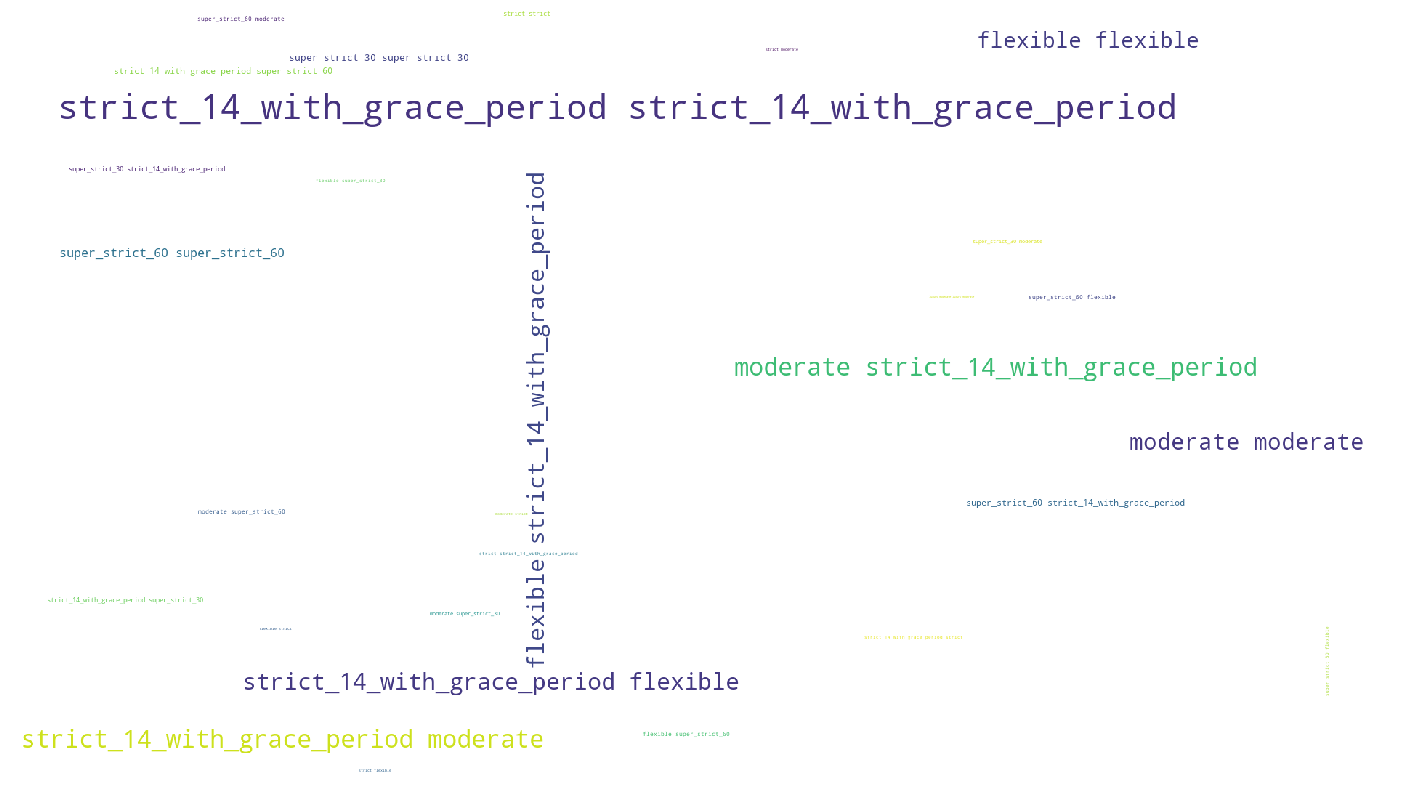

In [79]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.cancellation_policy))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cancellation_policy.png')
plt.show()